In [ ]:
import torch
import torchvision
import torchvision.transforms as transforms
import torch.nn as nn
import torch.optim as optim
from torchsummary import summary
import time

import numpy
import os
import matplotlib.pyplot as plt
import torch.nn.functional as F

In [ ]:
params = ((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
BATCH_SIZE = 256
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize(*params)])
trainset = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=BATCH_SIZE, shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root='./data', train=False, download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=BATCH_SIZE, shuffle=False, num_workers=2)

Files already downloaded and verified
Files already downloaded and verified


In [ ]:
print('Number of train samples: {}'.format(len(trainset)))
print('Number of test samples: {}'.format(len(testset)))

Number of train samples: 50000
Number of test samples: 10000


In [ ]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [ ]:
def accuracy(outputs, labels):
  _, predicted = torch.max(outputs.data, 1)
  return torch.sum(predicted == labels).item() / len(predicted)

In [ ]:
from tqdm import tqdm
def train_epoch(model, dataloader, criterion, optimizer):
  start_epoch = time.time()
  accs = 0
  total_loss = 0
  for (images, labels) in tqdm(trainloader):
      labels, images = labels.to(device), images.to(device)
      optimizer.zero_grad()
      outputs = model(images)
      loss = criterion(outputs, labels)
      acc = accuracy(outputs, labels)
      total_loss += loss
      accs += acc
      loss.backward()
      optimizer.step()
      end_epoch = time.time()
  return (total_loss / len(dataloader), accs / len(dataloader), end_epoch - start_epoch)

In [ ]:
def eval(model, dataloader, criterion):
  start_epoch = time.time()
  accs = 0
  total_loss = 0
  for images, labels in tqdm(dataloader):
      labels, images = labels.to(device), images.to(device)
      outputs = model(images)
      loss = criterion(outputs, labels)
      acc = accuracy(outputs, labels)
      total_loss += loss
      accs += acc
  end_epoch = time.time()
  return (total_loss / len(dataloader), accs / len(dataloader), end_epoch - start_epoch)

In [ ]:
def learn_model(model):
  criterion = nn.CrossEntropyLoss()
  optimizer = optim.Adam(model.parameters(), lr = 0.001)
  EPOCHS = 5
  start = time.time()
  for epoch in range(EPOCHS):
    total_loss, accs, delta = train_epoch(model, trainloader, criterion, optimizer)
    _, accuracy, _ = eval(model, testloader, criterion)
    print(f'Epoch #{epoch + 1}: loss = {total_loss}, acc = {accs}, time = {delta}, Test accuracy: {accuracy}', )
  end = time.time()
  print('Total time {}'.format(end - start))

In [ ]:
# https://pytorch.org/vision/stable/models.html

from torchvision.models import resnet50, ResNet50_Weights

model = resnet50(weights = ResNet50_Weights.IMAGENET1K_V2)
transform = ResNet50_Weights.IMAGENET1K_V2.transforms()

trainset = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=BATCH_SIZE, shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root='./data', train=False, download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=BATCH_SIZE, shuffle=False, num_workers=2)

for param in model.parameters():
    param.requires_grad = False

model.fc = torch.nn.Linear(2048, 10)
model.to(device)
learn_model(model)


Files already downloaded and verified
Files already downloaded and verified


100%|██████████| 40/40 [00:38<00:00,  1.05it/s]


Epoch #1: loss = 1.0523282289505005, acc = 0.6918486926020407, time = 184.5500409603119, Test accuracy: 0.750390625


100%|██████████| 40/40 [00:38<00:00,  1.05it/s]


Epoch #2: loss = 0.6884912848472595, acc = 0.7791254783163266, time = 180.4918487071991, Test accuracy: 0.77763671875


100%|██████████| 40/40 [00:37<00:00,  1.05it/s]


Epoch #3: loss = 0.6118777990341187, acc = 0.8018694196428571, time = 180.89696407318115, Test accuracy: 0.78701171875


100%|██████████| 40/40 [00:37<00:00,  1.06it/s]


Epoch #4: loss = 0.5707682967185974, acc = 0.8112643494897959, time = 183.38274717330933, Test accuracy: 0.79462890625


100%|██████████| 40/40 [00:37<00:00,  1.06it/s]

Epoch #5: loss = 0.53835129737854, acc = 0.8226203762755102, time = 182.3055021762848, Test accuracy: 0.7966796875
Total time 1101.966631412506


In [ ]:
model

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 

In [69]:
del model
model = resnet50(weights = ResNet50_Weights.IMAGENET1K_V2)
torch.cuda.empty_cache()
import gc
gc.collect()


for param in model.parameters():
  param.requires_grad = False
model = model.to(device)
model.fc = torch.nn.Sequential(torch.nn.Dropout(p=0.2, inplace=True), torch.nn.Linear(in_features=2048, out_features=10, bias=True)).to(device)
model.to(device)
learn_model(model)


100%|██████████| 40/40 [00:37<00:00,  1.08it/s]


Epoch #1: loss = 1.074893832206726, acc = 0.684016262755102, time = 184.41921472549438, Test accuracy: 0.74375


100%|██████████| 40/40 [00:38<00:00,  1.05it/s]


Epoch #2: loss = 0.723254919052124, acc = 0.7677455357142857, time = 182.1649374961853, Test accuracy: 0.7623046875


100%|██████████| 40/40 [00:36<00:00,  1.08it/s]


Epoch #3: loss = 0.6555927395820618, acc = 0.7841119260204081, time = 181.4669005870819, Test accuracy: 0.7671875


100%|██████████| 40/40 [00:39<00:00,  1.01it/s]


Epoch #4: loss = 0.6148117184638977, acc = 0.7966677295918367, time = 183.8064088821411, Test accuracy: 0.776953125


100%|██████████| 40/40 [00:39<00:00,  1.02it/s]

Epoch #5: loss = 0.5928179025650024, acc = 0.8013911033163265, time = 187.3982639312744, Test accuracy: 0.77490234375
Total time 1110.9243688583374


In [70]:
# Model # 2
model

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 

In [72]:
from torchvision.models import shufflenet_v2_x2_0, ShuffleNet_V2_X2_0_Weights

model = shufflenet_v2_x2_0(weights = ShuffleNet_V2_X2_0_Weights.IMAGENET1K_V1)
transform = ShuffleNet_V2_X2_0_Weights.IMAGENET1K_V1.transforms()

trainset = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=BATCH_SIZE, shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root='./data', train=False, download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=BATCH_SIZE, shuffle=False, num_workers=2)

for param in model.parameters():
    param.requires_grad = False

model.fc = torch.nn.Linear(2048, 10)
model.to(device)
learn_model(model)


Files already downloaded and verified
Files already downloaded and verified


100%|██████████| 40/40 [00:27<00:00,  1.48it/s]


Epoch #1: loss = 0.9022825360298157, acc = 0.7407126913265306, time = 132.49786853790283, Test accuracy: 0.81064453125


100%|██████████| 40/40 [00:27<00:00,  1.48it/s]


Epoch #2: loss = 0.5551961064338684, acc = 0.8234893176020408, time = 135.38950753211975, Test accuracy: 0.82783203125


100%|██████████| 40/40 [00:27<00:00,  1.47it/s]


Epoch #3: loss = 0.4867626130580902, acc = 0.8419602997448979, time = 132.579421043396, Test accuracy: 0.83623046875


100%|██████████| 40/40 [00:26<00:00,  1.50it/s]


Epoch #4: loss = 0.44725102186203003, acc = 0.8531608737244898, time = 130.97449445724487, Test accuracy: 0.8423828125


100%|██████████| 40/40 [00:26<00:00,  1.52it/s]

Epoch #5: loss = 0.4235909581184387, acc = 0.8599529655612245, time = 128.71161437034607, Test accuracy: 0.8443359375
Total time 795.1084408760071


In [73]:
model

ShuffleNetV2(
  (conv1): Sequential(
    (0): Conv2d(3, 24, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
    (1): BatchNorm2d(24, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
  )
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (stage2): Sequential(
    (0): InvertedResidual(
      (branch1): Sequential(
        (0): Conv2d(24, 24, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), groups=24, bias=False)
        (1): BatchNorm2d(24, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (2): Conv2d(24, 122, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (3): BatchNorm2d(122, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (4): ReLU(inplace=True)
      )
      (branch2): Sequential(
        (0): Conv2d(24, 122, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (1): BatchNorm2d(122, eps=1e-05, momentum=0.1, affine=True, track_runn

In [75]:
model = shufflenet_v2_x2_0(weights = ShuffleNet_V2_X2_0_Weights.IMAGENET1K_V1)
transform = ShuffleNet_V2_X2_0_Weights.IMAGENET1K_V1.transforms()

trainset = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=BATCH_SIZE, shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root='./data', train=False, download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=BATCH_SIZE, shuffle=False, num_workers=2)

for param in model.parameters():
    param.requires_grad = False


in_features = model.fc.in_features
model.fc = torch.nn.Sequential( torch.nn.Linear(in_features, in_features//2), torch.nn.ReLU(),torch.nn.Linear(in_features//2, 10))

model.to(device)
learn_model(model)

Files already downloaded and verified
Files already downloaded and verified


100%|██████████| 40/40 [00:26<00:00,  1.52it/s]


Epoch #1: loss = 0.6141566634178162, acc = 0.7949577487244899, time = 131.37379097938538, Test accuracy: 0.8357421875


100%|██████████| 40/40 [00:26<00:00,  1.49it/s]


Epoch #2: loss = 0.420958012342453, acc = 0.8563456632653061, time = 132.03545904159546, Test accuracy: 0.82841796875


100%|██████████| 40/40 [00:26<00:00,  1.49it/s]


Epoch #3: loss = 0.3673454523086548, acc = 0.872006536989796, time = 130.56480479240417, Test accuracy: 0.84638671875


100%|██████████| 40/40 [00:27<00:00,  1.48it/s]


Epoch #4: loss = 0.3213628828525543, acc = 0.887547831632653, time = 130.58350682258606, Test accuracy: 0.8482421875


100%|██████████| 40/40 [00:25<00:00,  1.57it/s]

Epoch #5: loss = 0.2689008116722107, acc = 0.905046237244898, time = 129.39200091362, Test accuracy: 0.8580078125
Total time 787.3439259529114


In [76]:
model

ShuffleNetV2(
  (conv1): Sequential(
    (0): Conv2d(3, 24, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
    (1): BatchNorm2d(24, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
  )
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (stage2): Sequential(
    (0): InvertedResidual(
      (branch1): Sequential(
        (0): Conv2d(24, 24, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), groups=24, bias=False)
        (1): BatchNorm2d(24, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (2): Conv2d(24, 122, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (3): BatchNorm2d(122, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (4): ReLU(inplace=True)
      )
      (branch2): Sequential(
        (0): Conv2d(24, 122, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (1): BatchNorm2d(122, eps=1e-05, momentum=0.1, affine=True, track_runn

In [113]:
# Model 3
from torchvision.models import vit_b_32,  ViT_B_32_Weights

model = vit_b_32(weights =  ViT_B_32_Weights.IMAGENET1K_V1)
transform =  ViT_B_32_Weights.IMAGENET1K_V1.transforms()

trainset = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=BATCH_SIZE, shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root='./data', train=False, download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=BATCH_SIZE, shuffle=False, num_workers=2)

for param in model.parameters():
    param.requires_grad = False


model.heads = torch.nn.Linear(768, 10)

model.to(device)
learn_model(model)
# model

Files already downloaded and verified
Files already downloaded and verified


100%|██████████| 40/40 [00:35<00:00,  1.11it/s]


Epoch #1: loss = 0.3924153447151184, acc = 0.8941764987244898, time = 184.2729697227478, Test accuracy: 0.92451171875


100%|██████████| 40/40 [00:37<00:00,  1.07it/s]


Epoch #2: loss = 0.19655275344848633, acc = 0.9367625956632653, time = 176.81656575202942, Test accuracy: 0.93701171875


100%|██████████| 40/40 [00:36<00:00,  1.09it/s]


Epoch #3: loss = 0.17148621380329132, acc = 0.9440409757653061, time = 178.79839730262756, Test accuracy: 0.9373046875


100%|██████████| 40/40 [00:37<00:00,  1.06it/s]


Epoch #4: loss = 0.15759989619255066, acc = 0.9489437181122449, time = 176.54026889801025, Test accuracy: 0.940625


100%|██████████| 40/40 [00:37<00:00,  1.06it/s]

Epoch #5: loss = 0.14753368496894836, acc = 0.9514508928571429, time = 177.5983371734619, Test accuracy: 0.9412109375
Total time 1080.697036266327


In [114]:
model

VisionTransformer(
  (conv_proj): Conv2d(3, 768, kernel_size=(32, 32), stride=(32, 32))
  (encoder): Encoder(
    (dropout): Dropout(p=0.0, inplace=False)
    (layers): Sequential(
      (encoder_layer_0): EncoderBlock(
        (ln_1): LayerNorm((768,), eps=1e-06, elementwise_affine=True)
        (self_attention): MultiheadAttention(
          (out_proj): NonDynamicallyQuantizableLinear(in_features=768, out_features=768, bias=True)
        )
        (dropout): Dropout(p=0.0, inplace=False)
        (ln_2): LayerNorm((768,), eps=1e-06, elementwise_affine=True)
        (mlp): MLPBlock(
          (0): Linear(in_features=768, out_features=3072, bias=True)
          (1): GELU(approximate='none')
          (2): Dropout(p=0.0, inplace=False)
          (3): Linear(in_features=3072, out_features=768, bias=True)
          (4): Dropout(p=0.0, inplace=False)
        )
      )
      (encoder_layer_1): EncoderBlock(
        (ln_1): LayerNorm((768,), eps=1e-06, elementwise_affine=True)
        (self_a

In [116]:
from torchvision.models import convnext_base, ConvNeXt_Base_Weights

model = vit_b_32(weights =  ViT_B_32_Weights.IMAGENET1K_V1)
transform =  ViT_B_32_Weights.IMAGENET1K_V1.transforms()

trainset = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=BATCH_SIZE, shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root='./data', train=False, download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=BATCH_SIZE, shuffle=False, num_workers=2)

for param in model.parameters():
    param.requires_grad = False


in_features = 768
model.heads = torch.nn.Sequential( torch.nn.Linear(in_features, in_features//2), torch.nn.ReLU(),torch.nn.Linear(in_features//2, 10))
model.to(device)
learn_model(model)



Files already downloaded and verified
Files already downloaded and verified


100%|██████████| 40/40 [00:36<00:00,  1.10it/s]


Epoch #1: loss = 0.2575783133506775, acc = 0.9227917729591837, time = 175.82350492477417, Test accuracy: 0.93837890625


100%|██████████| 40/40 [00:36<00:00,  1.08it/s]


Epoch #2: loss = 0.1522321254014969, acc = 0.9484773596938776, time = 176.42325925827026, Test accuracy: 0.93974609375


100%|██████████| 40/40 [00:36<00:00,  1.10it/s]


Epoch #3: loss = 0.12547685205936432, acc = 0.9567920918367347, time = 176.30937337875366, Test accuracy: 0.94462890625


100%|██████████| 40/40 [00:36<00:00,  1.08it/s]


Epoch #4: loss = 0.1039196029305458, acc = 0.9645527742346939, time = 176.82425498962402, Test accuracy: 0.944921875


100%|██████████| 40/40 [00:36<00:00,  1.09it/s]


Epoch #5: loss = 0.08537445217370987, acc = 0.9710100446428571, time = 176.07426834106445, Test accuracy: 0.9447265625
Total time 1065.9292514324188


In [ ]:
model

In [88]:
# model 4
from torchvision.models import resnet152, ResNet152_Weights

model = resnet152(weights = ResNet152_Weights.IMAGENET1K_V1)
transform = ResNet152_Weights.IMAGENET1K_V1.transforms()

trainset = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=BATCH_SIZE, shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root='./data', train=False, download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=BATCH_SIZE, shuffle=False, num_workers=2)

for param in model.parameters():
    param.requires_grad = False

model.fc = torch.nn.Linear(2048, 10)
model.to(device)
learn_model(model)

Files already downloaded and verified
Files already downloaded and verified


100%|██████████| 40/40 [01:22<00:00,  2.06s/it]


Epoch #1: loss = 0.8854718804359436, acc = 0.7278220663265306, time = 405.419554233551, Test accuracy: 0.7849609375


100%|██████████| 40/40 [01:22<00:00,  2.06s/it]


Epoch #2: loss = 0.6015558838844299, acc = 0.797118144132653, time = 405.8641574382782, Test accuracy: 0.796484375


100%|██████████| 40/40 [01:22<00:00,  2.05s/it]


Epoch #3: loss = 0.561643123626709, acc = 0.8052933673469388, time = 406.46436643600464, Test accuracy: 0.79892578125


100%|██████████| 40/40 [01:22<00:00,  2.06s/it]


Epoch #4: loss = 0.539940357208252, acc = 0.8149713010204082, time = 405.4200527667999, Test accuracy: 0.80654296875


100%|██████████| 40/40 [01:22<00:00,  2.07s/it]

Epoch #5: loss = 0.5276687741279602, acc = 0.8172313456632654, time = 407.4930040836334, Test accuracy: 0.80595703125
Total time 2443.4946496486664


In [89]:
model

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 

In [90]:
model = resnet152(weights = ResNet152_Weights.IMAGENET1K_V1)
transform = ResNet152_Weights.IMAGENET1K_V1.transforms()

trainset = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=BATCH_SIZE, shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root='./data', train=False, download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=BATCH_SIZE, shuffle=False, num_workers=2)

for param in model.parameters():
    param.requires_grad = False

in_features = model.fc.in_features
model.fc = torch.nn.Sequential( torch.nn.Linear(in_features, in_features//2), torch.nn.ReLU(),torch.nn.Linear(in_features//2, 10))

model.to(device)
learn_model(model)

Files already downloaded and verified
Files already downloaded and verified


100%|██████████| 40/40 [01:22<00:00,  2.07s/it]


Epoch #1: loss = 0.7524762749671936, acc = 0.7403340242346939, time = 406.33296394348145, Test accuracy: 0.776171875


100%|██████████| 40/40 [01:22<00:00,  2.07s/it]


Epoch #2: loss = 0.5804054737091064, acc = 0.7980827487244898, time = 406.59232664108276, Test accuracy: 0.7890625


100%|██████████| 40/40 [01:22<00:00,  2.07s/it]


Epoch #3: loss = 0.5405335426330566, acc = 0.8096061862244899, time = 405.9942395687103, Test accuracy: 0.80751953125


100%|██████████| 40/40 [01:23<00:00,  2.08s/it]


Epoch #4: loss = 0.5055608749389648, acc = 0.8227359693877551, time = 408.4101297855377, Test accuracy: 0.7900390625


100%|██████████| 40/40 [01:22<00:00,  2.06s/it]

Epoch #5: loss = 0.48533743619918823, acc = 0.8302535076530613, time = 407.77004051208496, Test accuracy: 0.8041015625
Total time 2450.188808441162


In [91]:
model

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 

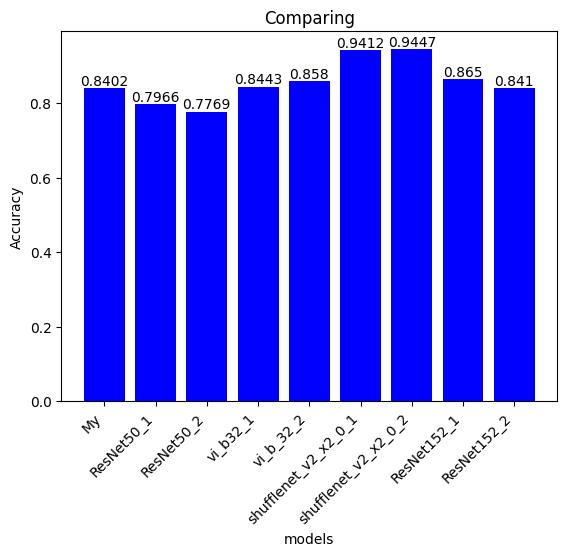

In [118]:
import matplotlib.pyplot as plt

models_names = ["My", "ResNet50_1", "ResNet50_2", "vi_b32_1", "vi_b_32_2", "shufflenet_v2_x2_0_1", "shufflenet_v2_x2_0_2", "ResNet152_1", "ResNet152_2"]
results = [0.8402,0.7966, 0.7769, 0.8443, 0.8580, 0.9412, 0.9447, 0.8650, 0.841]

plt.bar(models_names, results, color='blue')
plt.xlabel('models')
plt.ylabel('Accuracy')
plt.title('Comparing')
plt.xticks(rotation=45, ha='right')

for i, value in enumerate(results):
    plt.text(i, value, str(value), ha='center', va='bottom')

plt.show()